<a href="https://colab.research.google.com/github/jagvgithub/JJ-Models/blob/main/Propension.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import files
uploaded = files.upload()




Saving ModeloPropension2.xlsx to ModeloPropension2.xlsx


In [8]:
import pandas as pd

# Ruta al archivo xlsx en Google Colab
ruta_archivo = '/content/ModeloPropension2.xlsx'  # Asegúrate de que la ruta sea correcta según la ubicación del archivo cargado

# Leer el archivo xlsx usando pandas
datos = pd.read_excel(ruta_archivo)
datos=pd.DataFrame(datos)
# Mostrar los primeros 5 registros para verificar que se haya cargado correctamente
print(datos.head())

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


   DocumentoCliente  MontoIngresos    Egresos    Pasivos Origen Nacional  \
0        1000000479      2459000.0        0.0        0.0        COLOMBIA   
1        1000000655      1300000.0   312000.0        0.0        COLOMBIA   
2        1000000665       800000.0        NaN        NaN        COLOMBIA   
3        1000001306      1000000.0  5005000.0  5000000.0        COLOMBIA   
4        1000001372      1320000.0        NaN        NaN        COLOMBIA   

  Departamento   Municipio CodigoCIIU  MontoEntradasLarga  \
0       BOGOTA  BOGOTA D.C         99                 0.0   
1       BOGOTA  BOGOTA D.C         10                 0.0   
2       BOGOTA  BOGOTA D.C         10                 0.0   
3       BOGOTA  BOGOTA D.C         10                 0.0   
4       BOGOTA  BOGOTA D.C         10                 0.0   

   CantidadEntradasLarga  ...  Avance TC  repeticiones  Genero  \
0                      0  ...          0             0     NaN   
1                      0  ...          0    

In [9]:
 print(datos.dtypes)

DocumentoCliente                       int64
MontoIngresos                        float64
Egresos                              float64
Pasivos                              float64
Origen Nacional                       object
Departamento                          object
Municipio                             object
CodigoCIIU                            object
MontoEntradasLarga                   float64
CantidadEntradasLarga                  int64
MontoSalidasLarga                    float64
CantidadSalidasLarga                   int64
MontoEntradasCorta                   float64
CantidadEntradasCorta                  int64
MontoSalidasCorta                    float64
CantidadSalidasCorta                   int64
VulnerabilidadLavadoActivos          float64
VulnerabilidadTerrorismo             float64
DOCUMENTACION FALSA EN RADICACION      int64
DOCUMENTACION FALSA INCOCREDITO        int64
ValidacionFraudes                      int64
pep                                    int64
extranjero

In [10]:
datos['DocumentoCliente'] = datos['DocumentoCliente'].apply(lambda x: '{:.0f}'.format(x)).astype(str).str.strip()

In [11]:
 print(datos.dtypes)

DocumentoCliente                      object
MontoIngresos                        float64
Egresos                              float64
Pasivos                              float64
Origen Nacional                       object
Departamento                          object
Municipio                             object
CodigoCIIU                            object
MontoEntradasLarga                   float64
CantidadEntradasLarga                  int64
MontoSalidasLarga                    float64
CantidadSalidasLarga                   int64
MontoEntradasCorta                   float64
CantidadEntradasCorta                  int64
MontoSalidasCorta                    float64
CantidadSalidasCorta                   int64
VulnerabilidadLavadoActivos          float64
VulnerabilidadTerrorismo             float64
DOCUMENTACION FALSA EN RADICACION      int64
DOCUMENTACION FALSA INCOCREDITO        int64
ValidacionFraudes                      int64
pep                                    int64
extranjero

In [12]:
datos['DocumentoCliente'].head(15)

0     1000000479
1     1000000655
2     1000000665
3     1000001306
4     1000001372
5     1000001375
6     1000001437
7     1000001654
8     1000001785
9     1000001936
10    1000002200
11    1000002234
12    1000002323
13    1000002330
14    1000002477
Name: DocumentoCliente, dtype: object

In [14]:
list(datos.columns)

['DocumentoCliente',
 'MontoIngresos',
 'Egresos',
 'Pasivos',
 'Origen Nacional',
 'Departamento',
 'Municipio',
 'CodigoCIIU',
 'MontoEntradasLarga',
 'CantidadEntradasLarga',
 'MontoSalidasLarga',
 'CantidadSalidasLarga',
 'MontoEntradasCorta',
 'CantidadEntradasCorta',
 'MontoSalidasCorta',
 'CantidadSalidasCorta',
 'VulnerabilidadLavadoActivos',
 'VulnerabilidadTerrorismo',
 'DOCUMENTACION FALSA EN RADICACION',
 'DOCUMENTACION FALSA INCOCREDITO',
 'ValidacionFraudes',
 'pep',
 'extranjero',
 'Incomercio',
 'Aperturo_1_productos',
 'Aperturo_2_productos',
 'moras',
 'Compra comercio',
 'Compra internet',
 'Débitos',
 'Pago TDC',
 'Transferencia interbancaria',
 'Transferencia transfiya',
 'Retiro en cajero',
 'Retiro en oficina',
 'Reexpedicón TD',
 'Avance TC',
 'repeticiones',
 'Genero',
 'Acierta_Master',
 'Deuda financiera con Finandina',
 'Deuda financiera-TodasObligFinanc',
 'name1',
 'name2',
 'Pqrs',
 'RiesgoCanal']

In [ ]:
!pip install gender_guesser
import pandas as pd
import gender_guesser.detector as gender

# Función para estimar el género de un nombre
def estimar_genero(nombre):
    detector = gender.Detector()
    genero = detector.get_gender(nombre)
    return genero

# Aplicar la función a la columna de nombres y agregar el resultado como una nueva columna
datos['Genero_estimado_1'] = datos['name1'].apply(estimar_genero)
datos['Genero_estimado_2'] = datos['name2'].apply(estimar_genero)

In [ ]:
list(datos.columns)

In [17]:
import pandas as pd
import gender_guesser.detector as gender

# Función para estimar el género de una lista de nombres
def estimar_genero_por_bloques(nombres):
    detector = gender.Detector()
    generos = [detector.get_gender(nombre) for nombre in nombres]
    return generos

# Tamaño del bloque
tamano_bloque = 1000  # Puedes ajustar este valor según tus necesidades

# Dividir los nombres en bloques y aplicar la función por bloques
for i in range(0, len(datos), tamano_bloque):
    nombres_bloque1 = datos['name1'].iloc[i:i+tamano_bloque]
    nombres_bloque2 = datos['name2'].iloc[i:i+tamano_bloque]
    generos_estimados_bloque1 = estimar_genero_por_bloques(nombres_bloque1)
    generos_estimados_bloque2 = estimar_genero_por_bloques(nombres_bloque2)
    datos.loc[i:i+tamano_bloque-1, 'Genero_estimado_1'] = generos_estimados_bloque1
    datos.loc[i:i+tamano_bloque-1, 'Genero_estimado_2'] = generos_estimados_bloque2


In [22]:
import numpy as np
datos['Genero']=np.where(datos['Genero'].isna(),datos['Genero_estimado_1'],datos['Genero'])
datos['Genero']=np.where(datos['Genero'].isna(),datos['Genero_estimado_2'],datos['Genero'])

def mapear_genero(genero):
    if 'female' in genero:
        return 'Femenino'
    elif genero == 'F':
        return 'Femenino'
    elif pd.isnull(genero):
        return 'NA'
    else:
        return 'Masculino'

# Aplicar la función al DataFrame
datos['Genero'] = datos['Genero'].apply(lambda x: mapear_genero(x))
datos['Genero'].value_counts()


Genero
Masculino    13521
Femenino      6479
Name: count, dtype: int64

In [24]:
datos.drop(columns={'name1','name2','Genero_estimado_1','Genero_estimado_2'})

,DocumentoCliente,MontoIngresos,Egresos,Pasivos,Origen Nacional,Departamento,Municipio,CodigoCIIU,MontoEntradasLarga,CantidadEntradasLarga,...,Retiro en oficina,Reexpedicón TD,Avance TC,repeticiones,Genero,Acierta_Master,Deuda financiera con Finandina,Deuda financiera-TodasObligFinanc,Pqrs,RiesgoCanal
0,1000000479,2459000.0,0.0,0.0,COLOMBIA,BOGOTA,BOGOTA D.C,99,0.000000e+00,0,...,NaN,0,0,0,Masculino,886.0,0.0,4000.0,0,4
1,1000000655,1300000.0,312000.0,0.0,COLOMBIA,BOGOTA,BOGOTA D.C,10,0.000000e+00,0,...,0.0,0,0,0,Masculino,427.0,0.0,0.0,0,4
2,1000000665,800000.0,NaN,NaN,COLOMBIA,BOGOTA,BOGOTA D.C,10,0.000000e+00,0,...,NaN,0,0,0,Masculino,NaN,NaN,NaN,0,4
3,1000001306,1000000.0,5005000.0,5000000.0,COLOMBIA,BOGOTA,BOGOTA D.C,10,0.000000e+00,0,...,NaN,0,0,0,Femenino,413.0,5000000.0,5000000.0,0,4
4,1000001372,1320000.0,NaN,NaN,COLOMBIA,BOGOTA,BOGOTA D.C,10,0.000000e+00,0,...,0.0,0,0,54,Femenino,NaN,NaN,NaN,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1019068543,4500000.0,3640000.0,25937000.0,COLOMBIA,BOGOTA,BOGOTA D.C,99,0.000000e+00,0,...,NaN,0,0,0,Femenino,906.0,0.0,25937000.0,0,2
19996,1019068654,2400000.0,40651000.0,50257000.0,COLOMBIA,BOGOTA,BOGOTA D.C,10,0.000000e+00,0,...,NaN,0,0,0,Masculino,382.0,17046000.0,49817000.0,0,1
19997,1019068714,2470000.0,247000.0,0.0,COLOMBIA,BOGOTA,BOGOTA D.C,10,1.226000e+06,11,...,0.0,0,0,4,Masculino,802.0,0.0,0.0,0,4
19998,1019068731,2150000.0,1781000.0,105495000.0,COLOMBIA,BOGOTA,BOGOTA D.C,10,6.866468e+05,3,...,NaN,0,0,0,Masculino,690.0,0.0,105495000.0,0,1


In [ ]:
!pip install pycaret

In [26]:
datos.shape

(20000, 48)

In [27]:
data=datos.sample(frac=0.75,random_state=786).reset_index(drop=True) # entrenamitno
data_unusen =datos.drop(data.index).reset_index(drop=True) # testeo

In [28]:
print(data.shape,data_unusen.shape)

(15000, 48) (5000, 48)


In [29]:
from pycaret.classification import * # la data ya tiene una marcacion de  01

exp_clf101 = setup(data=data,target='Aperturo_2_productos',session_id=10001)  # RESUMEN DE LA VARIABLES

,Description,Value
0,Session id,10001
1,Target,Aperturo_2_productos
2,Target type,Binary
3,Original data shape,"(15000, 48)"
4,Transformed data shape,"(15000, 58)"
5,Transformed train set shape,"(10500, 58)"
6,Transformed test set shape,"(4500, 58)"
7,Numeric features,37
8,Categorical features,10
9,Rows with missing values,94.0%


In [30]:
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.6803,0.0000,0.5792,0.6352,0.6057,0.3378,0.3390,0.6360
lr,Logistic Regression,0.6309,0.7005,0.3452,0.6148,0.4418,0.1978,0.2161,1.4190
nb,Naive Bayes,0.6037,0.0000,0.1718,0.6199,0.2686,0.1034,0.1439,0.3970
et,Extra Trees Classifier,0.5893,0.0000,0.0357,0.9153,0.0676,0.0374,0.1198,0.8430
dt,Decision Tree Classifier,0.5759,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.4290
ridge,Ridge Classifier,0.5759,0.7443,0.0000,0.0000,0.0000,0.0000,0.0000,0.3860
rf,Random Forest Classifier,0.5759,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.3620
ada,Ada Boost Classifier,0.5759,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3800
gbc,Gradient Boosting Classifier,0.5759,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,1.6520
lda,Linear Discriminant Analysis,0.5759,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.5550


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [31]:
modelo = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6724,0.0000,0.5516,0.6308,0.5885,0.3184,0.3204
1,0.6657,0.0000,0.5471,0.6209,0.5816,0.3051,0.3068
2,0.6686,0.0000,0.5942,0.6134,0.6036,0.3190,0.3191
3,0.6743,0.0000,0.5640,0.6291,0.5948,0.3238,0.3252
4,0.7038,0.0000,0.6045,0.6658,0.6337,0.3861,0.3873
5,0.6771,0.0000,0.5596,0.6352,0.5950,0.3284,0.3302
6,0.6610,0.0000,0.5798,0.6042,0.5917,0.3021,0.3022
7,0.6848,0.0000,0.5978,0.6364,0.6165,0.3493,0.3498
8,0.7029,0.0000,0.6202,0.6587,0.6389,0.3868,0.3874


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [32]:
print(modelo)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


In [33]:
tuned_modelo = tune_model(modelo)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6876,0.0000,0.5561,0.6561,0.6019,0.3478,0.3510
1,0.7076,0.0000,0.5919,0.6787,0.6323,0.3915,0.3940
2,0.6933,0.0000,0.5919,0.6535,0.6212,0.3646,0.3659
3,0.7133,0.0000,0.5888,0.6895,0.6352,0.4015,0.4049
4,0.7010,0.0000,0.5528,0.6814,0.6104,0.3720,0.3774
5,0.7210,0.0000,0.6315,0.6854,0.6573,0.4226,0.4236
6,0.6971,0.0000,0.6090,0.6530,0.6302,0.3743,0.3750
7,0.6905,0.0000,0.5708,0.6546,0.6098,0.3553,0.3576
8,0.6876,0.0000,0.5685,0.6504,0.6067,0.3496,0.3517


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [35]:
print(tuned_modelo)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=35, p=2,
                     weights='uniform')


In [ ]:
help(plot_model) # validacion visual

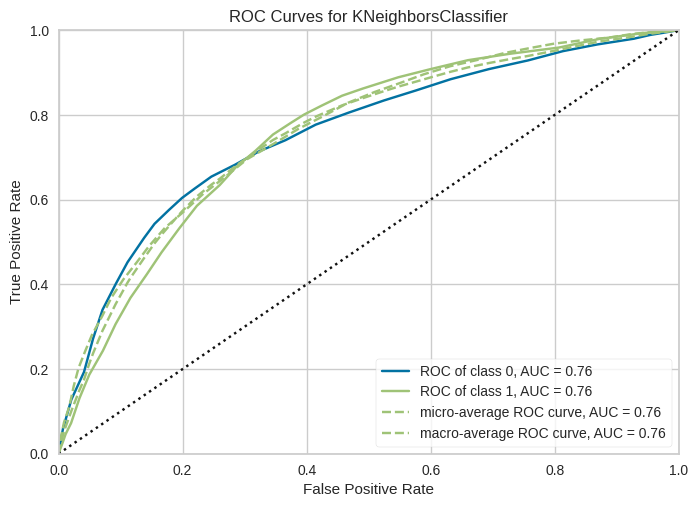

In [37]:
plot_model(tuned_modelo,plot='auc')

In [ ]:
# feature importance
plot_model(tuned_modelo,plot='feature')

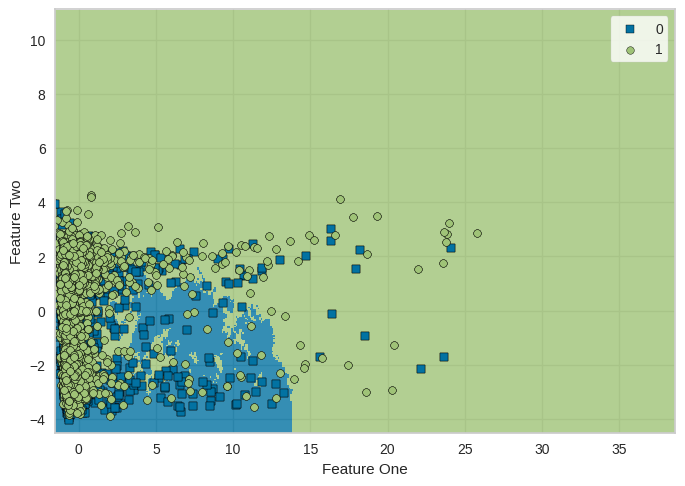

In [41]:
## Decision Boundary
plot_model(tuned_modelo, plot = 'boundary')

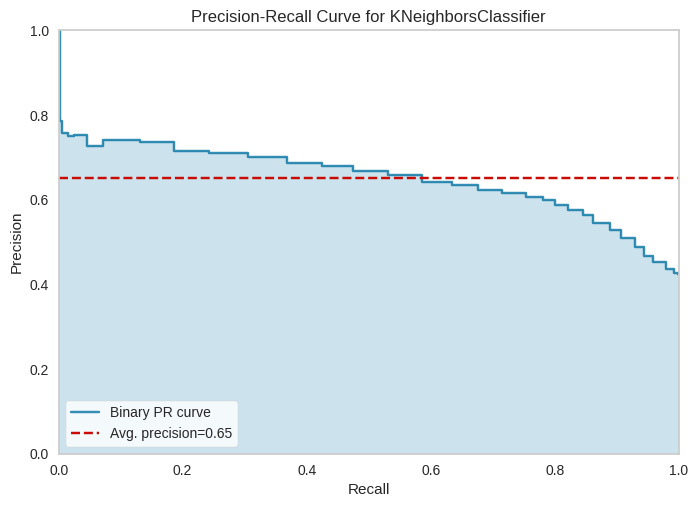

In [43]:
# Precision Recall Curve
plot_model(tuned_modelo, plot = 'pr')

In [ ]:
# Validation Curve
plot_model(tuned_modelo, plot = 'vc')

In [ ]:
predicciones = predict_model(tuned_modelo,data=data_unusen)
predicciones.head()